In [1]:
import pandas as pd

In [7]:
df1 = pd.read_csv("my_dataframe.csv")

In [12]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(category):
    # filter the dataframe for the given category
    category_df = df1[df1['category_id'] == category]
    
    # calculate likes to view ratio for each tag
    category_df['likes_to_views_ratio'] = category_df['likes'] / category_df['view_count']
    
    # define a function to extract words from each tag
    def extract_words(tag):
        # remove special characters and digits
        tag = re.sub('[^a-zA-Z]+', ' ', tag)
        # convert to lowercase and split into words
        words = tag.lower().split()
        return words

    # apply the extract_words function to the 'tags' column and concatenate the resulting lists
    tags = category_df['tags'].apply(extract_words).sum()
    
    # group the tags by their average ratio
    tag_ratio = category_df.groupby('tags')['likes_to_views_ratio'].mean().reset_index()

    # sort the tags based on their ratio in descending order
    sorted_tags = tag_ratio.sort_values(by='likes_to_views_ratio', ascending=False)

    # take top 50 tags based on their ratio
    top_tags = sorted_tags.head(50)

    # generate word cloud
    wordcloud = WordCloud(width=1200, height=800, stopwords=set(STOPWORDS)).generate(' '.join(top_tags['tags']))

    # plot the word cloud
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# prompt the user to enter


enter category: 
None20


/var/folders/xw/q8kl377d0yj967m_chfsw9_40000gn/T/ipykernel_26974/1288099592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['likes_to_views_ratio'] = category_df['likes'] / category_df['view_count']


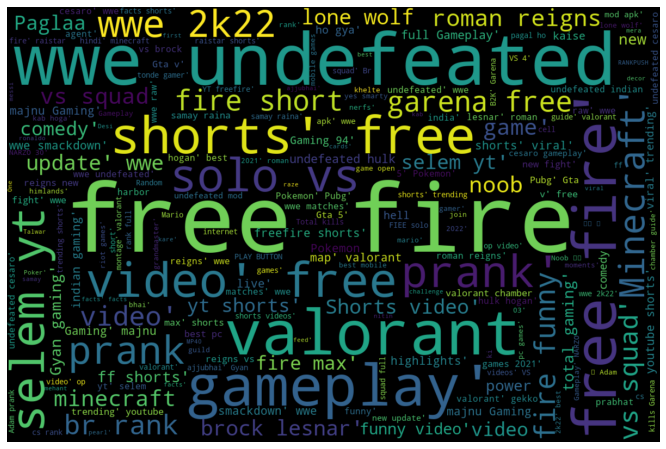

In [13]:
c = int(input(print("enter category: ")))
generate_wordcloud(c)